# CUSTOMER CHURN PREDICTION IN SYRIATEL #

## 1.  Business Understanding ## 


Syriatel is a telecommunications company providing mobile network services in Syria.The company seeks to address the increasing attrition rates observed among its clientele.This issue directly impacts the company's revenue stability and market share, necessitating a comprehensive understanding of its underlying causes.
Identifying the underlying factors driving customer defection and implementing proactive strategies to retain valuable subscribers are imperative to sustain profitability and competitiveness in the telecommunications industry.

This project therefore aims at helping SyriaTel tackle this challenge by building a classifier to predict whether a customer will soon stop doing business with the telecommunication company.Predicting customer churn allows SyriaTel to proactively address factors leading to customer dissatisfaction and implement strategies to retain valuable customers and ultimately improve customer satisfaction and loyalty, thereby reducing churn and strengthening its position in the competitive telecommunications landscape.

## Problem  Statement ##

As SyriaTel navigates a competitive telecommunications landscape, the increasing attrition of customers poses a significant challenge to its growth and profitability. This project focuses on developing a churn prediction model to pinpoint customers likely to leave. By analyzing the factors contributing to churn, SyriaTel can adopt proactive measures to enhance customer satisfaction and loyalty, ultimately improving retention rates thereby ensuring sustained profitability in a competitive market.

## Objectives ##

1. Identify Churn Patterns: Analyze customer data to uncover patterns associated with churn.


2. Develop a Customer Churn Prediction Model: Design a binary classification model employing machine learning techniques to estimate the probability of a customer discontinuing services. The model should be trained on past customer data and evaluated with suitable performance metrics such as accuracy, precision, recall, and F1-score.


3. Deliver Practical Recommendations: Provide practical recommendations and insights derived from the analysis and model outcomes. These insights should enable SyriaTel to make data-driven decisions and formulate targeted strategies for minimizing churn, including enhancing customer service, delivering personalized offers, or improving plan features.

## Metrics of Success ##

**Accuracy:** Often reported between 70% to 90% depending on the model and dataset.

**Precision:** Usually ranges from 60% to 85%, indicating the proportion of correctly predicted churners.

**Recall:** Commonly falls between 50% to 80%, reflecting the model's ability to identify actual churners.

**F1 Score:** Typically reported around 0.6 to 0.8, balancing precision and recall.

**ROC-AUC Score:** Often ranges from 0.7 to 0.9, showing the model's discrimination ability.

**Confusion Matrix Values:** Specific counts of true positives, false positives, true negatives, and false negatives are usually provided, but exact numbers vary by study.

## Conclusion ##

Creating a churn prediction model for SyriaTel is vital for reducing customer attrition and improving retention efforts. By utilizing machine learning and key performance metrics, the model will identify at-risk customers and provide actionable insights. This proactive approach will enable SyriaTel to enhance customer satisfaction, optimize retention strategies, and strengthen its market position, ultimately driving sustainable growth.

## 2. Data Understanding ##

The dataset was obtained from Kaggle [Kaggle website](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). The dataset from Kaggle provides a comprehensive view of various aspects of customer behavior and characteristics within the  SyriaTel's services including usage patterns, plan subscriptions, and customer service engagement and is crucial for analyzing factors that contribute to customer churn and for building predictive models.

In [1]:
import My_Functions as myf

In [2]:
pd = myf.load_data("data.csv")
pd.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
myf.check_data(pd)

Shape of DataFrame:
(3333, 21)
Size of DataFrame:
69993
Info of DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minute

The dataset consists of 3,333 records and contains 21 columns. It includes four object-type columns, eight integer columns, eight float columns, and one boolean column. The "churn" column is treated as the target variable for this analysis, while the other columns function as features. Key features in the dataset encompass metrics such as call minutes, total charges, customer service interactions, and details about customer plans. This information facilitates the examination of factors like the duration of phone calls, the amount billed to customers, and the number of times they contacted customer service.

* Customer Demographics(state)

* Account details(Account Length, Area Code, Phone)

* Service Plans(International Plan, Voice Mail Plan)

* Voice Mail Usage(Number Vmail Messages)

* Call Minutes and Charges(Total Day Minutes, Total Day Calls, Total Day Charge, Total Eve Minutes, Total Eve Calls, Total Eve Charge, Total Night Minutes, Total Night Calls, Total Night Charge, Total Intl Minutes, Total Intl Calls, Total Intl Charge)

* Customer Service interactions(Customer Service Calls)

* Customer Churn (boolean value indicating whether a customer churned)

## 3. Data Preparation ##

In this step, we check on whether our data contains missing, duplicate values, outliers, null values. By conducting these checks, we can enhance the quality of the dataset, leading to more reliable insights and improved predictive modeling outcomes.

In [4]:
myf.analyze_data(pd)

Missing Values:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64
Duplicate Rows:
 0


We checked for and findings are as shown below; 

* Missing Values: Our analysis revealed that there are no missing values in the dataset, indicating complete data integrity for all entries.

* Duplicate Entries: We also checked for duplicate records and found none, ensuring that each entry in the dataset is unique.

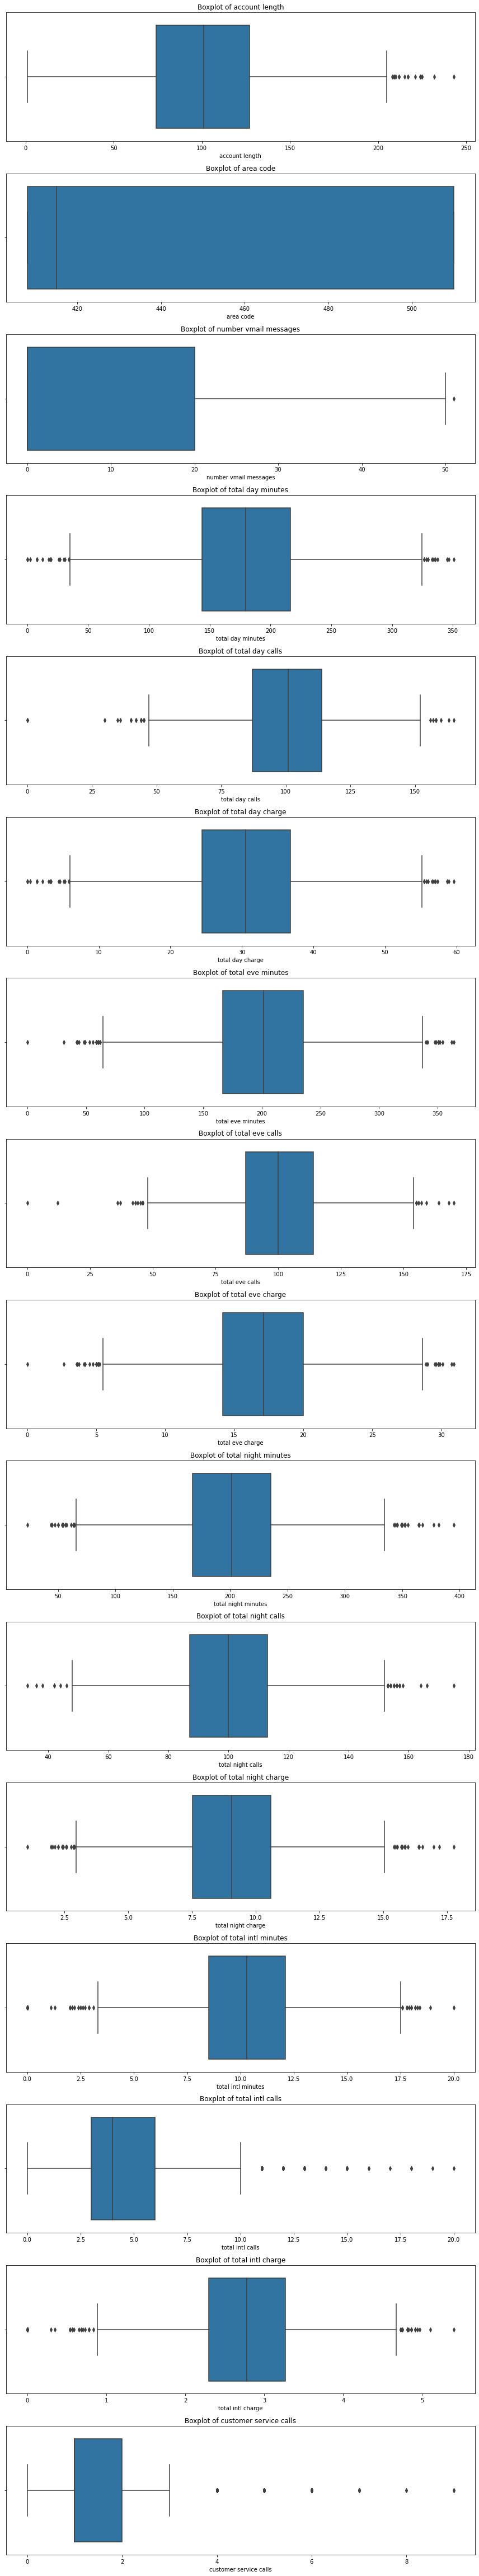

In [5]:
myf.outlierzz_data(pd)

Outliers can arise from various factors in a dataset eg. Mistakes in data collection, Faulty measuring instruments or software bugs, Human errors during data entry etc.
Understanding the causes of outliers is crucial as it helps determine whether they should be addressed, retained, or further analyzed since analysis and modelling will be affected by them.

These findings confirm that the dataset is clean and ready for analysis, which will enhance the reliability of our subsequent insights and models.

## 4. Exploratory Data Analysis ##

It's an iterative process that provides insights into the data and guides subsequent steps in analysis and modeling. 

In [6]:
# Print Numerical columns
print(f"Numerical Columns: {pd.select_dtypes(include='number').columns}\n")

# Print Categorical Columns
print(f"Categorical Columns: {pd.select_dtypes(include='object').columns}")

Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


### 4.1 Univariate Analysis ###

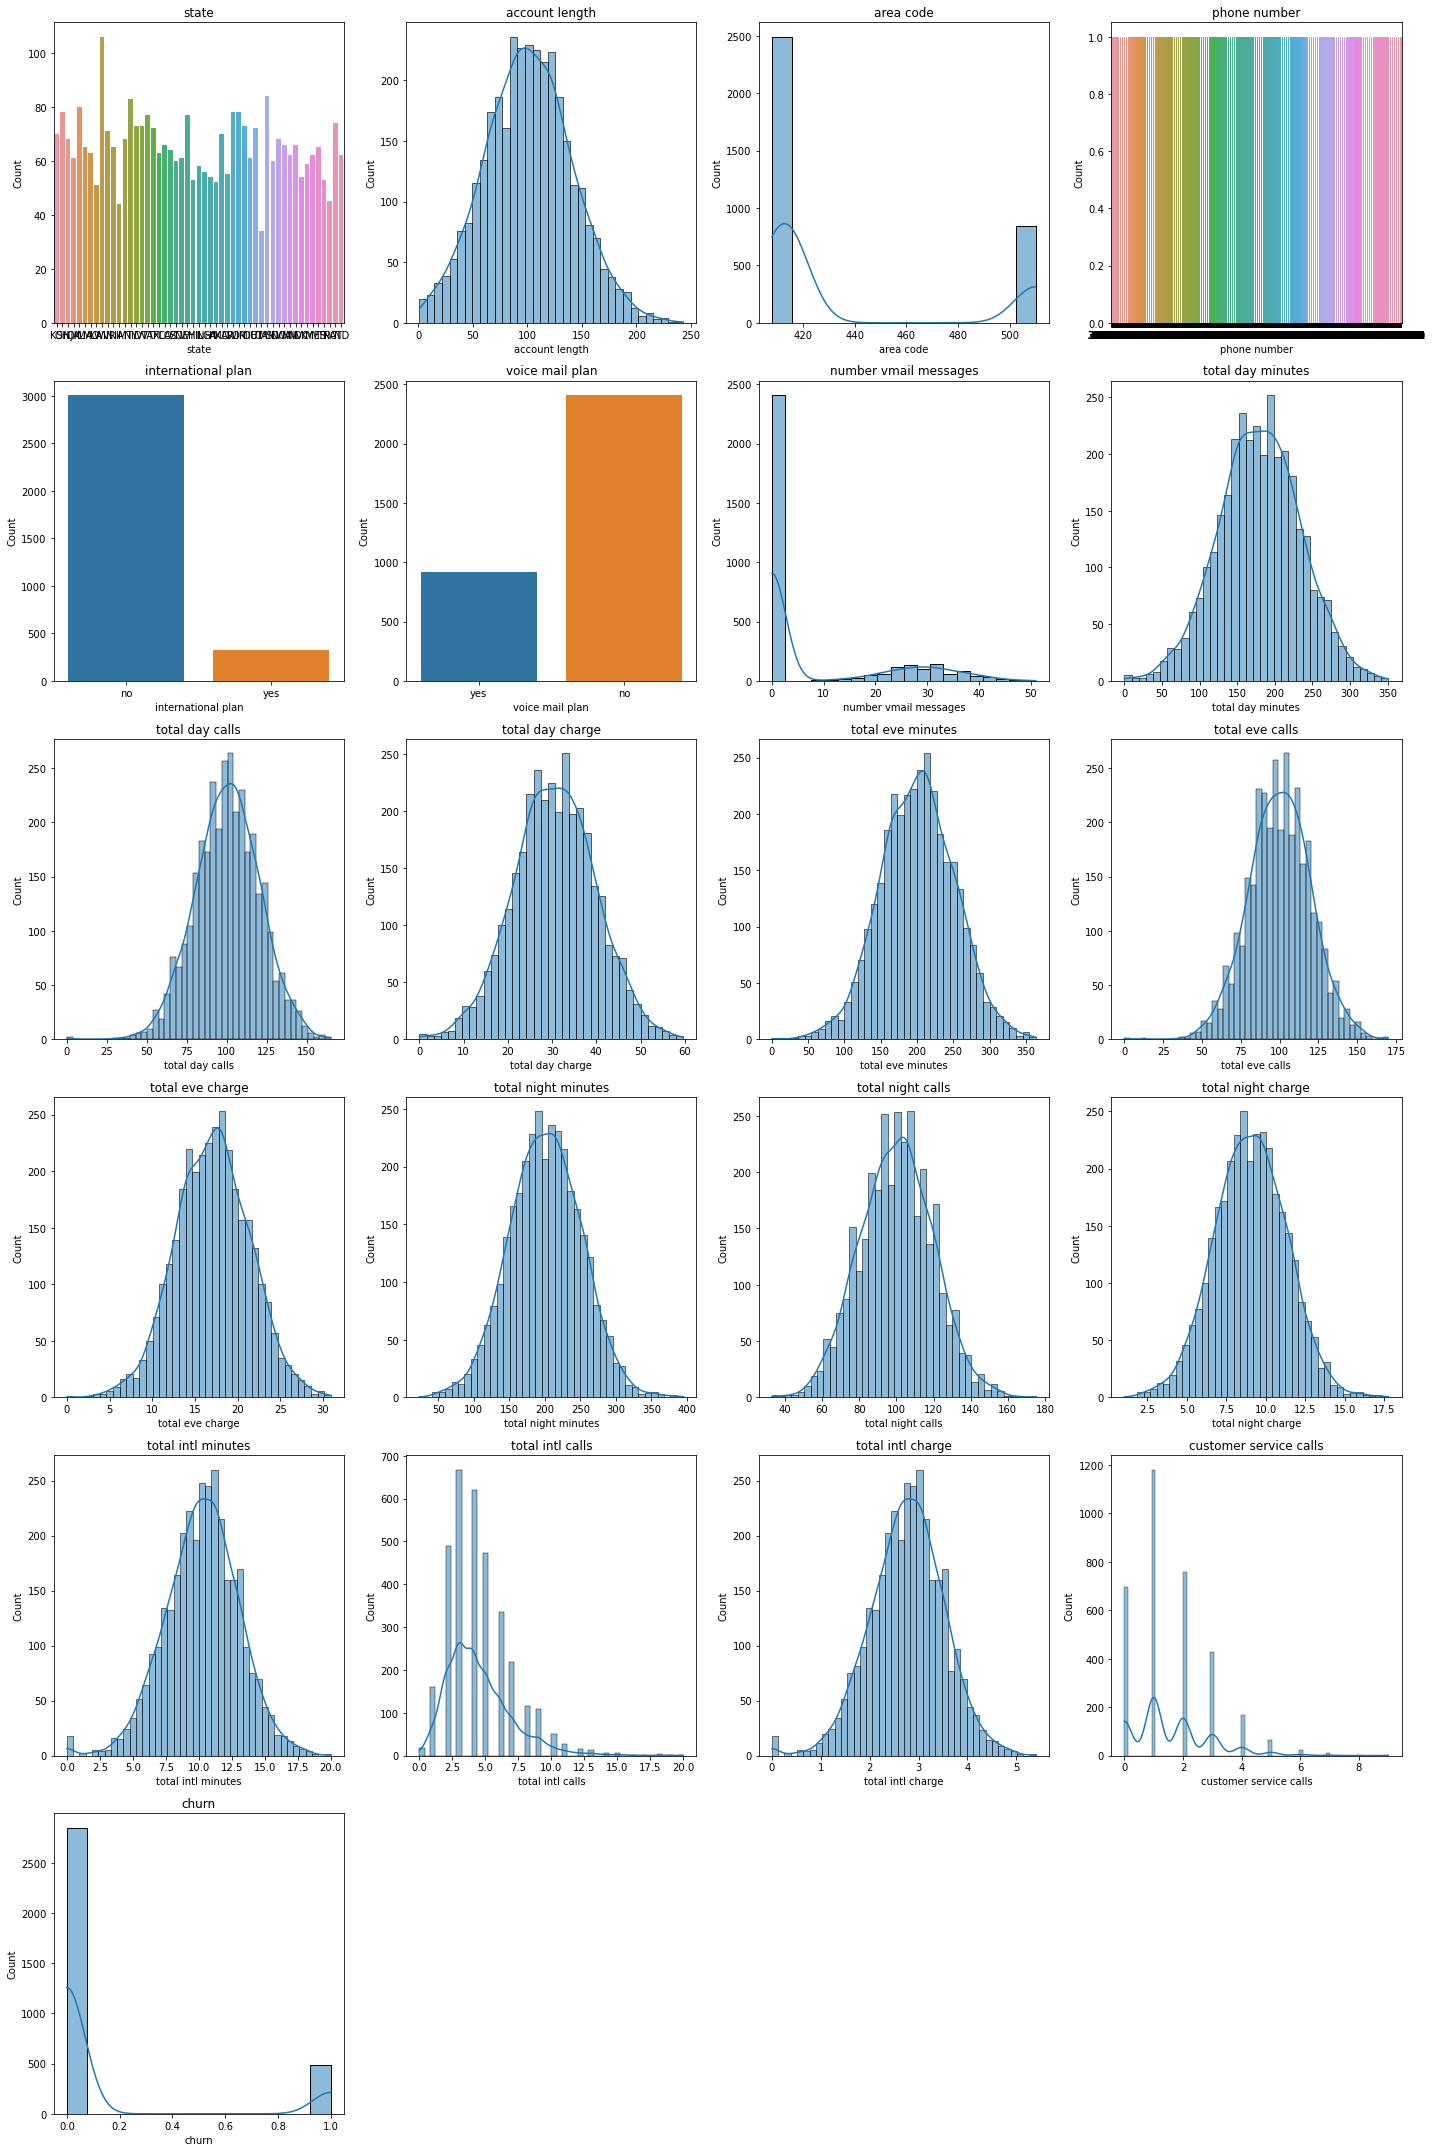

In [7]:
myf.univariate_analysis(pd)

The dataset includes a balanced distribution of customers across various states. Most customers have an account length between 50 to 150 days. Area codes are dominated by '415', with '510' and '408' less common. The phone number column should be excluded as it serves as a unique identifier. Most customers do not subscribe to international or voice mail plans, and voicemail usage is low overall. Day, evening, and night usage metrics (minutes, calls, charges) are normally distributed, while international metrics show skewness, indicating few customers make many international calls. Customer service calls are also right-skewed, with most customers making few calls. The churn variable is imbalanced, with most customers not churning, which is important for predictive modeling.

### 4.2 Bivariate Analysis ###

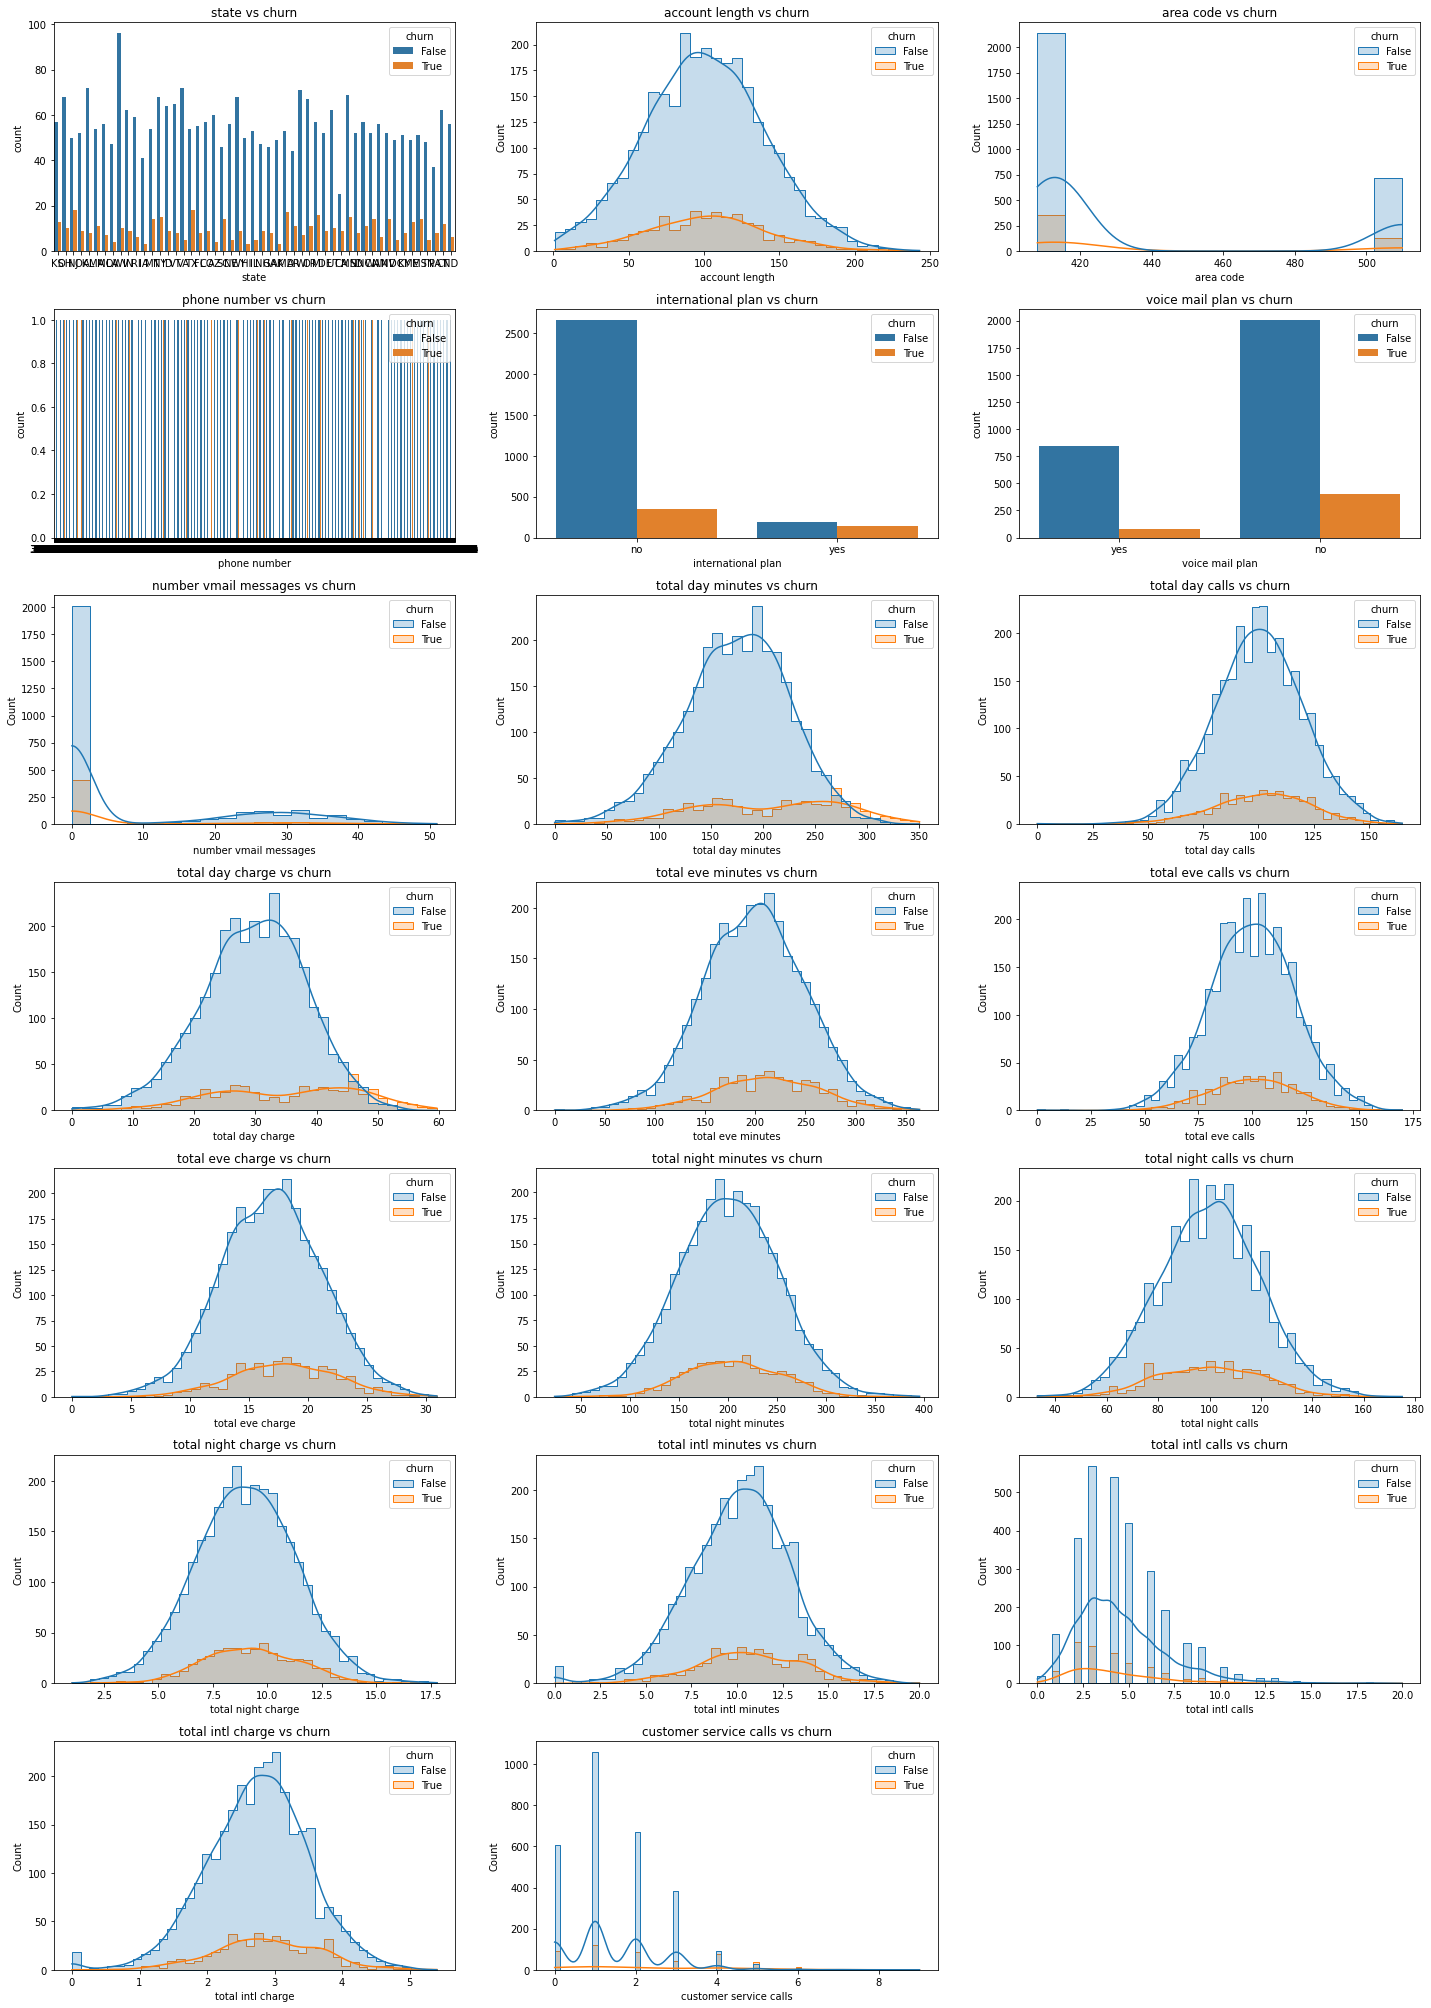

In [8]:
myf.bivariate_analysis(pd)

Churn rates vary by state, indicating its relevance as a predictive feature. In contrast, account length and area code show no strong correlation with churn. Customers without an international plan and those without a voice mail plan tend to have higher churn rates, suggesting these features are significant. Voicemail usage is also linked to lower churn. Most usage metrics (day/evening/night minutes, calls, and charges) do not strongly predict churn. However, fewer customer service calls correlate with lower churn rates, indicating it may be a relevant factor.

### 4.3 Multivariate Analysis

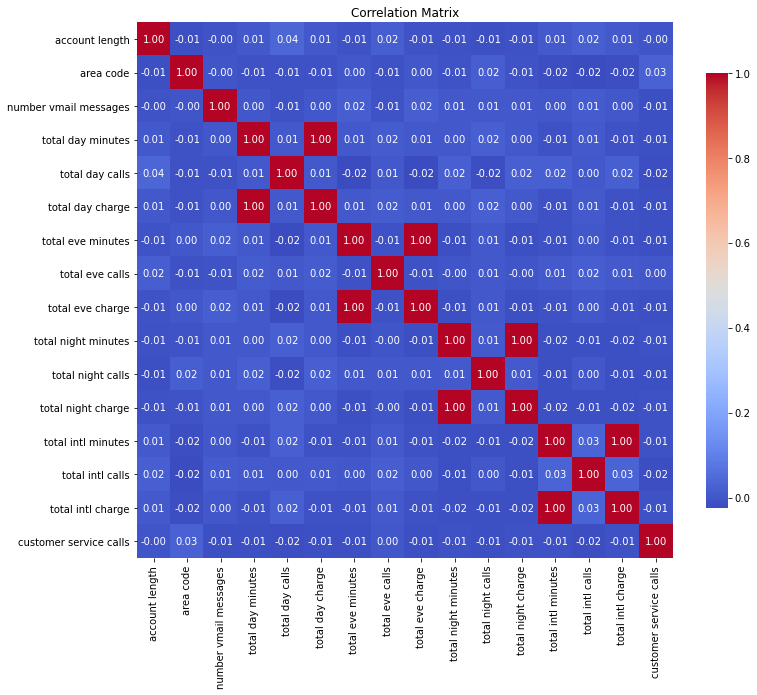

In [9]:
myf.multivariate_analysis(pd)

The correlation matrix reveals that account length and area code have weak relationships with other variables, indicating minimal impact on churn. Total day, evening, and night metrics show strong correlations among themselves, suggesting consistent usage patterns. 

International call metrics and customer service calls exhibit weak correlations, indicating they may not be significant predictors of churn or customer behavior.

Overall, the multivariate analysis highlights that usage patterns are more relevant for understanding churn than account length or area code.

### Dropping Highly-Correlated Features

Dropping features that have a correlation of 0.9 or above.

We choose to drop the charge features as they can be seen to be very strongly correlated with the minutes features.

In [10]:
# Dropping the columns

trimmed_pd = pd.drop(columns= ["state","area code","account length","phone number","total eve minutes",
                                "total night minutes","total night minutes","total day minutes","total intl minutes"], axis=1)

trimmed_pd.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day calls', 'total day charge', 'total eve calls',
       'total eve charge', 'total night calls', 'total night charge',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [11]:
trimmed_pd.head()

,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


## 5. Data Preprocessing

### 5.1 Perform Label Encoding

Converting boolean values to integers simplifies data handling, enhances model compatibility, and can improve the interpretability and performance of machine learning models.

In [12]:
trimmed_pd["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [13]:
trimmed_pd["voice mail plan"].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [14]:
trimmed_pd['churn'].value_counts() 

False    2850
True      483
Name: churn, dtype: int64

In [15]:
#Mapping application
trimmed_pd["international plan"] = trimmed_pd["international plan"].map({"yes": 1, "no": 0})
trimmed_pd["voice mail plan"] = trimmed_pd["voice mail plan"].map({"yes": 1, "no": 0})
trimmed_pd['churn'] = trimmed_pd['churn'].map({"True": 1, "False": 0}) 

In [16]:
print(trimmed_pd["international plan"].value_counts())
print("\n")
print(trimmed_pd["voice mail plan"].value_counts())
print("\n")
print(trimmed_pd['churn'].value_counts())
print("\n")

0    3010
1     323
Name: international plan, dtype: int64


0    2411
1     922
Name: voice mail plan, dtype: int64


0    2850
1     483
Name: churn, dtype: int64




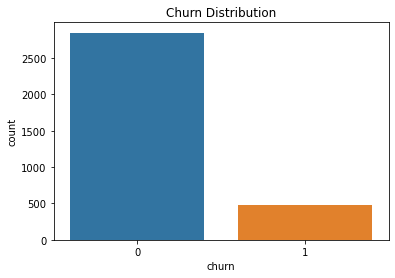

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=trimmed_pd)
plt.title('Churn Distribution')
plt.show()

## 6.) Logistic Regression

### 6.1 Perform a Train-Test Split

The first step is splitting the dataset into training and testing subsets. We use 80% of the data for training and 20% for testing. The stratify parameter ensures that the distribution of the target variable churn is similar across both sets.

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, log_loss, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV

y = trimmed_pd["churn"]
X = trimmed_pd.drop("churn", axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Check the shapes of the split data
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (2666, 12)
Test set size: (667, 12)


Train set size: (2666, 12) — 2,666 samples and 12 features.
Test set size: (667, 12) — 667 samples for testing.

Ensuring we have roughly equal percentages of churn for train vs. test targets:

In [39]:
print("Train percent churn:", y_train.value_counts(normalize=True)[1])
print("Test percent churn: ", y_test.value_counts(normalize=True)[1])

Train percent churn: 0.1447861965491373
Test percent churn:  0.1454272863568216


* Train percent churn: 14.48%

* Test percent churn: 14.54%

This confirms the churn distribution is consistent across the training and test sets.

###  6.2 Build and Evaluate a Baseline Model

In [40]:
# Preprocessing: Imputer and Scale features

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 6.2 Build and Evaluate a Baseline Model

Here, we build a logistic regression model using default hyperparameters, evaluate it using cross-validation, and calculate the log loss for both the training and test sets.

Cross-Validated Log Loss (Training Set): 0.3293497535731806
Test Log Loss: 0.3254776259776848


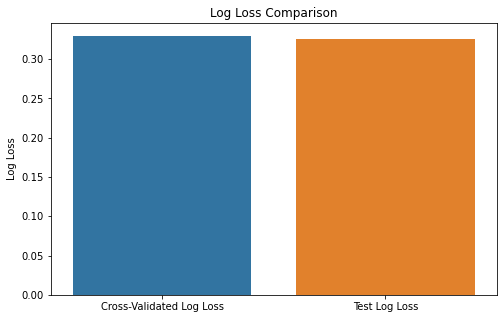

In [41]:
# Step 4: Initialize the Logistic Regression model (no hyperparameter tuning)
logistic_reg = LogisticRegression(C=0.1, penalty='l2', max_iter=1000, random_state=42)

# Evaluate using cross-validation on the training data (balanced with SMOTE)
cv_scores = cross_val_score(logistic_reg, X_train_scaled, y_train, cv=5, scoring='neg_log_loss')

# Since cross_val_score returns negative log loss, negate it to get positive log loss
cv_log_loss = -cv_scores.mean()

# Step 6: Fit the model on the entire training set (original, unbalanced)
logistic_reg.fit(X_train_scaled, y_train)

# Step 7: Make predictions on the test set
y_pred_prob = logistic_reg.predict_proba(X_test_scaled)

# Step 8: Calculate log loss on the test set
test_log_loss = log_loss(y_test, y_pred_prob)

# Output the results
print("Cross-Validated Log Loss (Training Set):", cv_log_loss)
print("Test Log Loss:", test_log_loss)

# Visualize Log Loss Comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=['Cross-Validated Log Loss', 'Test Log Loss'], y=[cv_log_loss, test_log_loss])
plt.title('Log Loss Comparison')
plt.ylabel('Log Loss')
plt.show()

* Cross-Validated Log Loss (Training Set): 0.329
* Test Log Loss: 0.325

* Interpretation:
The cross-validated log loss and test log loss are close, suggesting the model generalizes well to the test data

### 6.3 Write a Custom Cross Validation Function

We create a custom cross-validation function because we need to apply SMOTE for class balancing and scaling features separately for each fold of the cross-validation. This function ensures proper handling of class imbalance and preprocessing.

In [42]:
# Custom cross-validation function
def custom_cross_val_score(X, y, model, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    log_losses = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Preprocessing: Scale features and apply SMOTE
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        
        # Apply SMOTE on the training data only to handle class imbalance
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
        
        # Fit the logistic regression model on the balanced training data
        model.fit(X_train_balanced, y_train_balanced)
        
        # Make predictions on the validation set
        y_val_pred_prob = model.predict_proba(X_val_scaled)
        
        # Calculate log loss for the current fold
        loss = log_loss(y_val, y_val_pred_prob)
        log_losses.append(loss)
    
    # Return the mean log loss across all folds
    return np.mean(log_losses)

# Define the logistic regression model (with default hyperparameters)
logistic_reg = LogisticRegression(max_iter=1000, random_state=42)

# Call the custom cross-validation function on the data
cv_log_loss = custom_cross_val_score(X, y, logistic_reg, cv=5)

# Print the mean log loss from cross-validation
print("Custom Cross-Validated Log Loss:", cv_log_loss)


Custom Cross-Validated Log Loss: 0.5231690517466883


The output Custom Cross-Validated Log Loss: 0.5231690517466883 indicates that the model's predictive performance is average. A lower log loss value (closer to 0) means better accuracy in predicting probabilities for the target class. This value suggests there’s potential for improvement in the model's predictions.

This is the log loss from cross-validation using the custom function, indicating the average performance over the 5 folds.

### 6.4 Build and Evaluate Additional Logistic Regression Models

We evaluate multiple logistic regression models with different hyperparameters to minimize the log loss using the custom cross-validation function. The hyperparameters tested include variations in regularization strength (C) and penalty types (l1, l2, elasticnet).

In [43]:
# Define a function to evaluate multiple models with different hyperparameters
def evaluate_logistic_models(X, y, hyperparams, cv=5):
    results = []
    
    for params in hyperparams:
        # Create a logistic regression model with specific hyperparameters
        logistic_reg = LogisticRegression(**params, max_iter=1000, random_state=42)
        
        # Evaluate the model using the custom cross-validation function
        log_loss = custom_cross_val_score(X, y, logistic_reg, cv=cv)
        
        # Store the results
        results.append((params, log_loss))
        print(f"Params: {params}, Log Loss: {log_loss:.4f}")
    
    return results

# Define hyperparameters to test
hyperparameters = [
    {'C': 0.001, 'penalty': 'l2'},
    {'C': 0.01, 'penalty': 'l2'},
    {'C': 0.1, 'penalty': 'l2'},
    {'C': 1.0, 'penalty': 'l2'},
    {'C': 10.0, 'penalty': 'l2'},
    {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'},  
    {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'},      
    {'C': 1.0, 'penalty': 'elasticnet', 'solver': 'saga', 'l1_ratio': 0.5} 
]

# Evaluate models with the defined hyperparameters
results = evaluate_logistic_models(X, y, hyperparameters)

# Find the best model based on log loss
best_model = min(results, key=lambda x: x[1])
print(f"\nBest Model Parameters: {best_model[0]}, Best Log Loss: {best_model[1]:.4f}")

Params: {'C': 0.001, 'penalty': 'l2'}, Log Loss: 0.5629
Params: {'C': 0.01, 'penalty': 'l2'}, Log Loss: 0.5228
Params: {'C': 0.1, 'penalty': 'l2'}, Log Loss: 0.5224
Params: {'C': 1.0, 'penalty': 'l2'}, Log Loss: 0.5232
Params: {'C': 10.0, 'penalty': 'l2'}, Log Loss: 0.5233
Params: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}, Log Loss: 0.5234
Params: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}, Log Loss: 0.5232
Params: {'C': 1.0, 'penalty': 'elasticnet', 'solver': 'saga', 'l1_ratio': 0.5}, Log Loss: 0.5232

Best Model Parameters: {'C': 0.1, 'penalty': 'l2'}, Best Log Loss: 0.5224


**Log Loss Results:**
The lowest log loss among the tested models is 0.5224 for the model with C = 0.1 and l2 penalty.

**Best Model:**
Best Log Loss: 0.5224
This indicates that this combination provides the best predictive performance based on the log loss metric.

### 6.5 Choose and Evaluate a Final Model

After selecting the best hyperparameters, we train a final logistic regression model and evaluate it using various classification metrics like accuracy, precision, recall, F1-score, ROC AUC, and confusion matrix.

In [44]:
# Create the final Logistic Regression model with chosen parameters
final_model = LogisticRegression(C=0.1, penalty='l2', max_iter=1000, random_state=42)

# Fit the final model on the training data
final_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=42)

In [45]:
# Make predictions on the test set
y_pred = final_model.predict(X_test_scaled)
y_pred_prob = final_model.predict_proba(X_test_scaled)


# Evaluate the model performance using multiple metrics
log_loss_value = log_loss(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])  # Probability of the positive class

# Output evaluation metrics
print(f"Log Loss: {log_loss_value:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Log Loss: 0.3255
Accuracy: 0.8546
Precision: 0.5000
Recall: 0.1340
F1 Score: 0.2114
ROC AUC: 0.8264


The model performs well in terms of accuracy, but precision and recall indicate it struggles to identify churn cases (low recall).

### 6.6 Confusion Matrix

A confusion matrix provides insight into false positives (FP), false negatives (FN), true positives (TP), and true negatives (TN), which is critical for understanding model behavior.

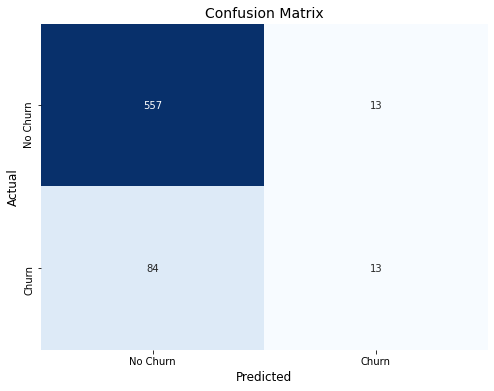

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], cbar=False)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

* True Negatives (TN): 557

* False Positives (FP): 13

* False Negatives (FN): 84

* True Positives (TP): 13

* Interpretation:
The model correctly identifies most of the non-churn customers (TN) but misses many churn cases (FN).

### 6.7 ROC Curve

The ROC curve shows how well the model differentiates between churn and no-churn cases.

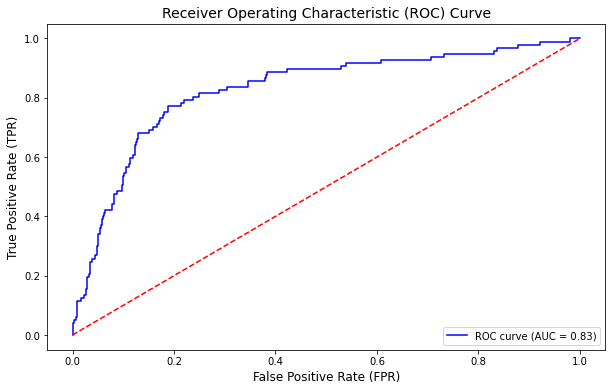

In [48]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (no discrimination)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right')
plt.show()

ROC Curve above visualizes the performance of a binary classification model.

* The AUC value is 0.83, indicating good model performance—higher values (up to 1.0) suggest better discrimination.
Conclusion:

* This ROC curve shows that the model effectively separates positive and negative classes, with an AUC of 0.83 indicating strong predictive capability.

### 6.8 Feature Importance

Feature importance can be extracted from the model coefficients, which indicate which features have the most impact on predictions.

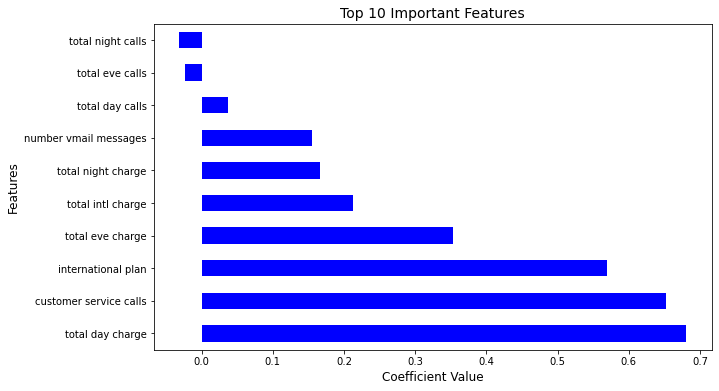

In [50]:
# Extract the feature importance from the model coefficients
feature_importance = pd.Series(final_model.coef_[0], index=X.columns)
top_features = feature_importance.nlargest(10)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='blue')
plt.title('Top 10 Important Features', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

The top 10 features influencing customer churn predictions in the logistic regression modelare displayed above.

**Key Insights:

* Customer Service Calls: Strongest positive influence on churn; more calls correlate with higher churn likelihood.

* International Plan: Significant impact on churn behavior.

* Other features like Total Night Calls and Total Day Calls also affect churn but to a lesser extent.

**Interpretation:** All highlighted features are positively correlated with churn, suggesting they increase the likelihood of customers leaving.

## Model Evaluation

### Hyperparameter Tuning using Grid Search

Grid search is used to tune the hyperparameters of the logistic regression model.

In [52]:
# Grid Search for Hyperparameter Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("\nBest Hyperparameters from Grid Search:", best_params)


Best Hyperparameters from Grid Search: {'C': 100, 'penalty': 'l2'}


This indicates that the best combination of parameters for the logistic regression model was C=100 and penalty='l2'.

### Cross-Validation

It's a technique to assess how well the model generalizes by splitting the data into different subsets and evaluating the model on each subset. The following code calculates cross-validation scores:

In [53]:
scores = cross_val_score(final_model, X, y, cv=5)
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.86506747 0.86056972 0.86056972 0.86486486 0.86186186]


These scores show that the model performs consistently with an average score of about 86%

### Confusion Matrix

A confusion matrix helps visualize how well the model is classifying each class (non-churn and churn).

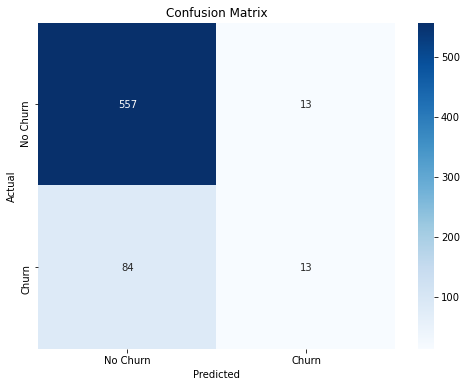

In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**True Negatives (TN):**
557: Correctly predicted "No Churn."

**False Positives (FP):**
13: Incorrectly predicted "Churn" when it was "No Churn."

**False Negatives (FN):**
84: Missed actual "Churn" cases predicted as "No Churn."

**True Positives (TP):**
13: Correctly predicted "Churn."

**Interpretation**

* High TN (557): Good at spotting non-churners.

* Low TP (13): Struggles to identify actual churners.

Concerns: Many churners (84) are missed (FN), which is critical for retention efforts.

### Learning curves 

They plot how well the model performs with varying amounts of training data. If the performance stabilizes, it suggests the model is not overfitting and is generalizing well. A significant gap between training and testing curves suggests overfitting..

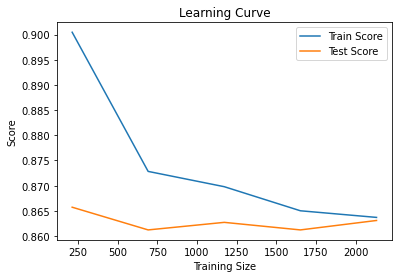

In [55]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(final_model, X_train, y_train, cv=5)
train_means = train_scores.mean(axis=1)
test_means = test_scores.mean(axis=1)

plt.plot(train_sizes, train_means, label='Train Score')
plt.plot(train_sizes, test_means, label='Test Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

* Overfitting: The training score is much higher than the test score initially, showing overfitting.

* Stability: The test score stabilizes, suggesting the model is not improving significantly with more data after a certain point.

### 6. Feature Importance

We checked feature importance to understand which factors influence the model's predictions the most.

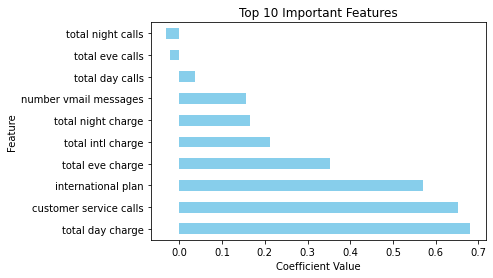

In [56]:
feature_importance = pd.Series(final_model.coef_[0], index=X.columns)
feature_importance.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


* Top 10 Important Features: The chart shows the ten features that most affect the model.

* Coefficient Value: Higher values indicate stronger influence on predictions.

* Features Listed: Features like "total night calls" and "customer service calls" are the most significant.

## 7.) Decision Trees

Decision trees are beneficial for modeling because they are easy to interpret, handle non-linear relationships, and require no feature scaling. They can work with both numerical and categorical data, are robust to outliers, and automatically select important features.


### 7.1 Model Initialization and Training 
In this section, we import the necessary libraries and initialize a basic Decision Tree model. The model is trained using the scaled training data.

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train) # Train the model

DecisionTreeClassifier(random_state=42)

### 7.2 Model Evaluation
After training the model, we evaluate its performance on the test data using multiple metrics: accuracy, precision, recall, F1 score, and ROC AUC.

In [59]:
# Predictions on the test set
y_pred = dt_model.predict(X_test_scaled)
y_pred_prob = dt_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.9070
Precision: 0.6768
Recall: 0.6907
F1 Score: 0.6837
ROC AUC: 0.8173


* Accuracy (0.9070): 90.7% of predictions are correct.

* Precision (0.6768): 67.7% of positive predictions are true positives.
    
* Recall (0.6907): 69.1% of actual positives are correctly identified.

* F1 Score (0.6837): Balance between precision and recall.
    
* ROC AUC (0.8173): Model performance; 81.7% area under the curve indicates good discrimination between classes.

### 7.3 Confusion Matrix
A confusion matrix helps us visualize how the decision tree performs in classifying churn vs. no-churn cases.

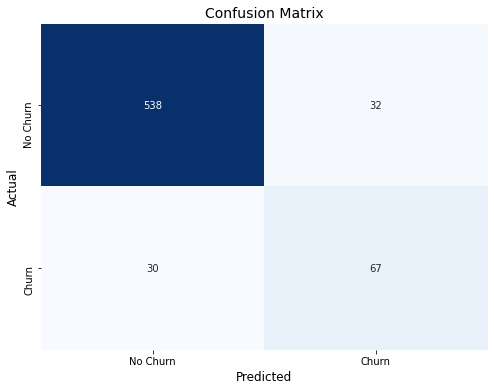

In [60]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], cbar=False)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()


* True Negatives (538): Correctly predicted "No Churn."

* False Positives (32): Incorrectly predicted "Churn" when it was "No Churn."

* False Negatives (30): Missed "Churn" predictions (predicted "No Churn").

* True Positives (67): Correctly predicted "Churn."

**Summary**
The model is good at identifying "No Churn" but has some errors in predicting "Churn."

### 7.4 Model Tuning 
Hyperparameters of the decision tree can be tuned using techniques such as grid search to optimize the model's performance. In this case, we tune the max_depth, min_samples_split, and min_samples_leaf parameters.

In [62]:
# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


* Best Parameters:

* max_depth: 10: Allows deeper trees for better fitting.

* min_samples_leaf: 5: Requires at least 5 samples in leaf nodes.

* min_samples_split: 2: Minimum samples required to split a node.

These parameters optimize the model's performance.

### 7.5 Feature Importance
Decision trees provide feature importance directly. We will plot the most important features to understand which ones have the highest impact on churn prediction.

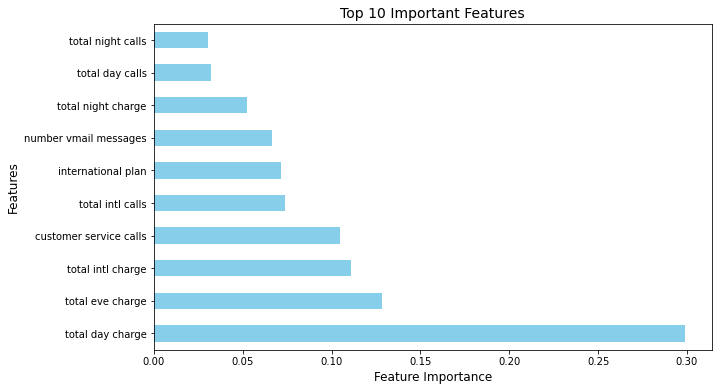

In [63]:
feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns)
top_features = feature_importance.nlargest(10)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features', fontsize=14)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()


Displays the most influential features in the model.

* Key Features:

total day change: Most significant factor.
Other notable features include total night calls, customer service calls, and total day calls.

### 7.6 Model Visualization  
Visualizing the decision tree allows us to understand how the model is making decisions based on the features..

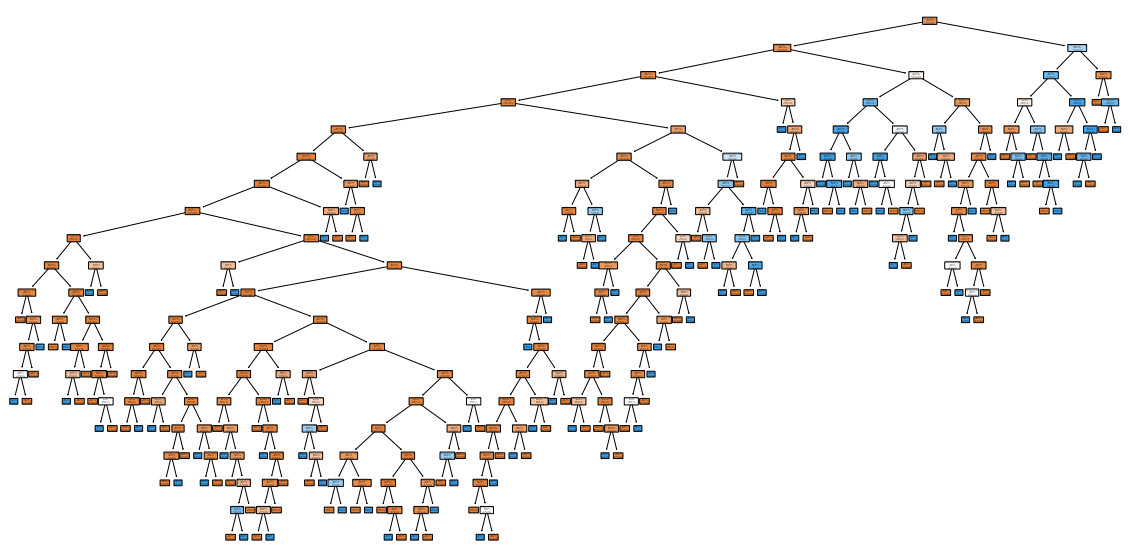

In [64]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'], rounded=True)
plt.show()

* Nodes: Each rectangular box represents a decision point based on a specific feature. The feature determines how the data is split at that point.

* Branches: Lines connecting the nodes indicate the flow of decisions. Each branch corresponds to a possible outcome of the decision made at the parent node.

* Leaf Nodes: The endpoints of the branches (often depicted as different shapes or colors) represent final classifications or outcomes. These are the predictions made by the model.

This visualization provides insight into the decision-making process of the model, demonstrating how it arrives at its predictions based on the input features.

#### Testing Precision and Accuracy on my unseen data

In [66]:
from sklearn.metrics import precision_score, accuracy_score

# Step 1: Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)  # Use your scaled test data

# Step 2: Calculate Precision
precision = precision_score(y_test, y_pred)

# Step 3: Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Step 4: Print the results
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.6768
Accuracy: 0.9070


**Precision (0.6768):**
This means when my model predicts churn, it is correct 67.68% of the time. A precision of 0.6768 is quite decent. In practice, this implies that while the model identifies many churn cases correctly, it also misidentifies some non-churn cases as churn (false positives).

**Accuracy (0.9070):**
This means that your model is correct 90.70% of the time in both churn and non-churn predictions. This is a high accuracy, which generally indicates the model is doing well, especially on balanced datasets.

The model's high accuracy indicates it's performing well overall, but the precision of 0.6768 suggests that the model may still have room for improvement in distinguishing between churn and non-churn, specifically in minimizing false positives.

## 8.) Evaluation

Metrics Comparison:
Accuracy:

LR: 0.8546
DT: 0.9070 Rank: DT > LR
Precision:

LR: 0.5000
DT: 0.6768 Rank: DT > LR
Recall:

LR: 0.1340
DT: 0.6907 Rank: DT > LR
F1 Score:

LR: 0.2114
DT: 0.6837 Rank: DT > LR
ROC AUC:

LR: 0.8264
DT: 0.8173 Rank: LR > DT

* DT outperforms LR across most metrics, especially in terms of accuracy, precision, recall, and F1 score, indicating it's more reliable at distinguishing between churn and non-churn cases.

* LR slightly outperforms DT in ROC AUC, suggesting it might have a marginally better ability to differentiate between the classes at different thresholds, though both models perform similarly in this aspect.

* DT is a better overall model in this case, especially considering its higher accuracy and ability to identify both churners and non-churners effectively.

## 9.) Recommendations


**Improve Feature Engineering:**
Customer Service Calls and International Plan are key features influencing churn. Consider creating new features or using feature interactions (e.g., customer service calls combined with tenure) to improve model performance.

**Class Imbalance:**
The Logistic Regression model struggles with recall, as it fails to predict many churn cases. Ensure that SMOTE or other balancing techniques are consistently applied during model training to address class imbalance, particularly for models with poor recall.

**Threshold Adjustment:**
Consider adjusting the decision threshold for the Logistic Regression model to improve recall without significantly hurting precision. A lower threshold could help in capturing more churn cases (FN) while balancing the precision-recall trade-off.

**Hyperparameter Tuning:**
Grid Search or Random Search could be employed to further tune hyperparameters for Logistic Regression (C, penalty type) and Decision Trees (max depth, min samples split, max features). Hyperparameter optimization is essential to avoid overfitting and improve generalization.

**Feature Importance:**
Decision Trees show strong performance with a clear interpretation of feature importance. Focus on improving features such as Customer Service Calls and International Plan, which have the highest impact on churn prediction.

**Customer Retention Strategy:**
Based on model insights, focus retention efforts on customers with high churn likelihood (identified by both models), particularly those showing frequent customer service calls and high usage of certain features like International Plan.

## 10.) Coclusions

**Model Performance:**
Logistic Regression performed reasonably well in terms of accuracy (85.46%) but struggled with recall (13.4%), meaning it missed a large portion of the actual churn cases. This indicates the model’s difficulty in identifying churners, which is critical in a customer retention context.
Decision Tree showed superior performance in terms of recall and precision, though it had some limitations regarding generalization (tendency to overfit), suggesting that while it performs well on training data, its ability to generalize to unseen data could be improved.

**Key Features:**
The most important features influencing customer churn are Customer Service Calls and International Plan. These features are strongly correlated with churn, indicating that customers who interact more with customer service or have international plans are more likely to churn.
Feature Engineering improvements, such as creating interaction terms or new derived features, could help improve model performance further.

**Class Imbalance:**
Both models were impacted by class imbalance, where the number of churn cases is much lower than non-churn cases. While SMOTE (Synthetic Minority Over-sampling Technique) was applied to balance the data, it's clear that better handling of this imbalance is critical to improving recall.

**Model Interpretability:**
Decision Trees offer better interpretability with clear insights into which features contribute most to the prediction. This is important for understanding customer behavior and informing business decisions, especially in churn prediction.

## 11.) Next Steps

**Deployment for Access to End Users:** 
Create user access dashboards or reports using tools like Power BI, Tableau, or Dashboards in Python (using libraries like Streamlit or Dash) that display key churn prediction insights and trends, such as the number of at-risk customers or the impact of specific features on churn.

**Collecting More Data Points:**
Collect more detailed customer behavior data such as usage patterns, customer complaints, account changes, and service issues. This data can provide more insights into what drives churn beyond basic features like customer service calls or international plan usage. Integrate survey responses or direct feedback from customers to capture qualitative factors contributing to churn, such as dissatisfaction with product quality, pricing, or customer support.

**Feature Engineering:** Use this new data to enhance feature engineering efforts. Derive new features that might be more predictive of churn, such as customer engagement scores, social media sentiment, or usage decay patterns.

**Hyperparameter Tuning:** Conduct hyperparameter tuning for both the Logistic Regression and Decision Tree models to optimize their performance. This includes experimenting with different settings for the regularization of Logistic Regression and pruning strategies for Decision Trees.

**Scalability:** Scale the Model: As the company grows, scale the model to handle a larger customer base by optimizing the deployment infrastructure, for example, moving to cloud-based solutions.